In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## Stage 1: Raw data

In [2]:
# Enter input paths for footfall data
path_footfall = 'C:/Users/medira/OneDrive - University of Leeds/Projects/AmbPop/AmbPopData/LCC_footfall_cleaned_2021.csv'

# Enter output paths for the folder storing outputs
dir_out = '../AmbPop_Outputs/'

In [3]:
# Load footfall data to pandas DataFrame
df_footfall = pd.read_csv(
   path_footfall
)
df_footfall['DateTime'] = pd.to_datetime(df_footfall['DateTime'])
df_footfall['Date'] = pd.to_datetime(df_footfall['Date'])
df_footfall['Year'] = df_footfall.Date.dt.year
df_footfall['Month'] = df_footfall.Date.dt.month
df_footfall['Hour'] = df_footfall.Date.dt.hour
df_footfall['YearMonth'] = df_footfall.Date.dt.to_period('M')
df_footfall['MonthDay'] = df_footfall.Date.dt.day
df_footfall['WeekDay'] = df_footfall.Date.dt.weekday
df_footfall['WeekDayName'] = df_footfall.Date.dt.day_name()
df_footfall['IsWeekend'] = df_footfall.WeekDay > 4
df_footfall['YearMonthDay'] = df_footfall['Year'].astype(str) + '-' + df_footfall['MonthDay'].astype(str)
df_footfall['YearWeekDay'] = df_footfall['Year'].astype(str) + '-' + df_footfall['WeekDay'].astype(str)
df_footfall['YearMonthWeekDay'] = df_footfall['YearMonth'].astype(str) + '-' + df_footfall['WeekDay'].astype(str)
df_footfall['LocationYear'] = df_footfall['Location'].astype(str) + '-' + df_footfall['Year'].astype(str)
df_footfall['LocationYearMonth'] = df_footfall['Location'].astype(str) + '-' + df_footfall['YearMonth'].astype(str)


df_footfall = df_footfall[['Location', 'LocationYear', 'LocationYearMonth', 'Count', 'DateTime', 'Date', 'Year', 'YearMonth', 'Month',
                           'YearMonthDay', 'MonthDay', 'YearWeekDay', 'WeekDay', 'YearMonthWeekDay',
                           'WeekDayName', 'IsWeekend', 'BRCWeekNum', 'BRCMonthNum', 'BRCMonth', 'BRCYear']]

df_footfall.info()
df_footfall.head()

C:\ProgramData\Anaconda3\envs\ambpop\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/09/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\envs\ambpop\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/06/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\envs\ambpop\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/06/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\envs\ambpop\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/11/2020

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793558 entries, 0 to 793557
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Location           793558 non-null  object        
 1   LocationYear       793558 non-null  object        
 2   LocationYearMonth  793558 non-null  object        
 3   Count              793558 non-null  int64         
 4   DateTime           793558 non-null  datetime64[ns]
 5   Date               793558 non-null  datetime64[ns]
 6   Year               793558 non-null  int64         
 7   YearMonth          793558 non-null  period[M]     
 8   Month              793558 non-null  int64         
 9   YearMonthDay       793558 non-null  object        
 10  MonthDay           793558 non-null  int64         
 11  YearWeekDay        793558 non-null  object        
 12  WeekDay            793558 non-null  int64         
 13  YearMonthWeekDay   793558 non-null  object  

,Location,LocationYear,LocationYearMonth,Count,DateTime,Date,Year,YearMonth,Month,YearMonthDay,MonthDay,YearWeekDay,WeekDay,YearMonthWeekDay,WeekDayName,IsWeekend,BRCWeekNum,BRCMonthNum,BRCMonth,BRCYear
0,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,3,2020-03-08 00:00:00,2020-03-08,2020,2020-03,3,2020-8,8,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020
1,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,6,2020-03-08 01:00:00,2020-03-08,2020,2020-03,3,2020-8,8,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020
2,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,1,2020-03-08 02:00:00,2020-03-08,2020,2020-03,3,2020-8,8,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020
3,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,30,2020-03-08 03:00:00,2020-03-08,2020,2020-03,3,2020-8,8,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020
4,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,20,2020-03-08 04:00:00,2020-03-08,2020,2020-03,3,2020-8,8,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020


# Stage 2: Add and View

In [4]:
df_footfall['NumRecords'] = df_footfall.groupby('Location')['Location'].transform('count')

df_footfall.info()
df_footfall.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793558 entries, 0 to 793557
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Location           793558 non-null  object        
 1   LocationYear       793558 non-null  object        
 2   LocationYearMonth  793558 non-null  object        
 3   Count              793558 non-null  int64         
 4   DateTime           793558 non-null  datetime64[ns]
 5   Date               793558 non-null  datetime64[ns]
 6   Year               793558 non-null  int64         
 7   YearMonth          793558 non-null  period[M]     
 8   Month              793558 non-null  int64         
 9   YearMonthDay       793558 non-null  object        
 10  MonthDay           793558 non-null  int64         
 11  YearWeekDay        793558 non-null  object        
 12  WeekDay            793558 non-null  int64         
 13  YearMonthWeekDay   793558 non-null  object  

,Location,LocationYear,LocationYearMonth,Count,DateTime,Date,Year,YearMonth,Month,YearMonthDay,...,YearWeekDay,WeekDay,YearMonthWeekDay,WeekDayName,IsWeekend,BRCWeekNum,BRCMonthNum,BRCMonth,BRCYear,NumRecords
0,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,3,2020-03-08 00:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020,104904
1,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,6,2020-03-08 01:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020,104904
2,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,1,2020-03-08 02:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020,104904
3,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,30,2020-03-08 03:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020,104904
4,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,20,2020-03-08 04:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020,104904


In [5]:
df_footfall.drop(df_footfall[df_footfall['NumRecords'] != 104904].index, inplace=True)

df_footfall.info()
df_footfall.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629424 entries, 0 to 793557
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Location           629424 non-null  object        
 1   LocationYear       629424 non-null  object        
 2   LocationYearMonth  629424 non-null  object        
 3   Count              629424 non-null  int64         
 4   DateTime           629424 non-null  datetime64[ns]
 5   Date               629424 non-null  datetime64[ns]
 6   Year               629424 non-null  int64         
 7   YearMonth          629424 non-null  period[M]     
 8   Month              629424 non-null  int64         
 9   YearMonthDay       629424 non-null  object        
 10  MonthDay           629424 non-null  int64         
 11  YearWeekDay        629424 non-null  object        
 12  WeekDay            629424 non-null  int64         
 13  YearMonthWeekDay   629424 non-null  object  

,Location,LocationYear,LocationYearMonth,Count,DateTime,Date,Year,YearMonth,Month,YearMonthDay,...,YearWeekDay,WeekDay,YearMonthWeekDay,WeekDayName,IsWeekend,BRCWeekNum,BRCMonthNum,BRCMonth,BRCYear,NumRecords
0,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,3,2020-03-08 00:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020,104904
1,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,6,2020-03-08 01:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020,104904
2,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,1,2020-03-08 02:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020,104904
3,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,30,2020-03-08 03:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020,104904
4,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,20,2020-03-08 04:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-6,6,2020-03-6,Sunday,True,32,8,August,2020,104904


In [6]:
print(df_footfall[df_footfall.Count == df_footfall.Count.max()])

                  Location              LocationYear  \
75613  Albion Street South  Albion Street South-2008   

                 LocationYearMonth  Count            DateTime       Date  \
75613  Albion Street South-2008-12  23268 2008-12-22 13:00:00 2008-12-22   

       Year YearMonth  Month YearMonthDay  ...  YearWeekDay WeekDay  \
75613  2008   2008-12     12      2008-22  ...       2008-0       0   

       YearMonthWeekDay WeekDayName IsWeekend  BRCWeekNum  BRCMonthNum  \
75613         2008-12-0      Monday     False          52           12   

       BRCMonth BRCYear  NumRecords  
75613  December    2008      104904  

[1 rows x 21 columns]


In [7]:
print(df_footfall[df_footfall.Count == df_footfall.Count.min()])

                   Location              LocationYear  \
26      Albion Street South  Albion Street South-2020   
100     Albion Street South  Albion Street South-2020   
673         Dortmund Square      Dortmund Square-2020   
675         Dortmund Square      Dortmund Square-2020   
696         Dortmund Square      Dortmund Square-2020   
...                     ...                       ...   
789169  Albion Street South  Albion Street South-2016   
789170  Albion Street South  Albion Street South-2016   
789217  Albion Street South  Albion Street South-2016   
789218  Albion Street South  Albion Street South-2016   
789371             Briggate             Briggate-2016   

                  LocationYearMonth  Count            DateTime       Date  \
26      Albion Street South-2020-04      0 2020-04-08 02:00:00 2020-04-08   
100     Albion Street South-2020-07      0 2020-07-08 04:00:00 2020-07-08   
673         Dortmund Square-2020-03      0 2020-03-08 01:00:00 2020-03-08   
675    

In [8]:
df_footfall['TotCountByLocationByYear'] = (df_footfall.groupby(['Location', 'Year'])['Count'].transform('sum'))

df_footfall.info()
df_footfall.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629424 entries, 0 to 793557
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Location                  629424 non-null  object        
 1   LocationYear              629424 non-null  object        
 2   LocationYearMonth         629424 non-null  object        
 3   Count                     629424 non-null  int64         
 4   DateTime                  629424 non-null  datetime64[ns]
 5   Date                      629424 non-null  datetime64[ns]
 6   Year                      629424 non-null  int64         
 7   YearMonth                 629424 non-null  period[M]     
 8   Month                     629424 non-null  int64         
 9   YearMonthDay              629424 non-null  object        
 10  MonthDay                  629424 non-null  int64         
 11  YearWeekDay               629424 non-null  object        
 12  We

,Location,LocationYear,LocationYearMonth,Count,DateTime,Date,Year,YearMonth,Month,YearMonthDay,...,WeekDay,YearMonthWeekDay,WeekDayName,IsWeekend,BRCWeekNum,BRCMonthNum,BRCMonth,BRCYear,NumRecords,TotCountByLocationByYear
0,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,3,2020-03-08 00:00:00,2020-03-08,2020,2020-03,3,2020-8,...,6,2020-03-6,Sunday,True,32,8,August,2020,104904,3472463
1,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,6,2020-03-08 01:00:00,2020-03-08,2020,2020-03,3,2020-8,...,6,2020-03-6,Sunday,True,32,8,August,2020,104904,3472463
2,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,1,2020-03-08 02:00:00,2020-03-08,2020,2020-03,3,2020-8,...,6,2020-03-6,Sunday,True,32,8,August,2020,104904,3472463
3,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,30,2020-03-08 03:00:00,2020-03-08,2020,2020-03,3,2020-8,...,6,2020-03-6,Sunday,True,32,8,August,2020,104904,3472463
4,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,20,2020-03-08 04:00:00,2020-03-08,2020,2020-03,3,2020-8,...,6,2020-03-6,Sunday,True,32,8,August,2020,104904,3472463


In [9]:
df_footfall_samp1 = df_footfall.drop_duplicates('LocationYear')
print(df_footfall_samp1[df_footfall.TotCountByLocationByYear == df_footfall.TotCountByLocationByYear.max()])

        Location   LocationYear LocationYearMonth  Count   DateTime  \
311760  Briggate  Briggate-2016  Briggate-2016-01     76 2016-01-08   

             Date  Year YearMonth  Month YearMonthDay  ...  WeekDay  \
311760 2016-01-08  2016   2016-01      1       2016-8  ...        4   

       YearMonthWeekDay  WeekDayName IsWeekend BRCWeekNum  BRCMonthNum  \
311760        2016-01-4       Friday     False         31            8   

        BRCMonth  BRCYear NumRecords  TotCountByLocationByYear  
311760    August     2016     104904                  13883910  

[1 rows x 22 columns]


C:\Users\medira\AppData\Local\Temp\ipykernel_16460\2816319747.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_footfall_samp1[df_footfall.TotCountByLocationByYear == df_footfall.TotCountByLocationByYear.max()])


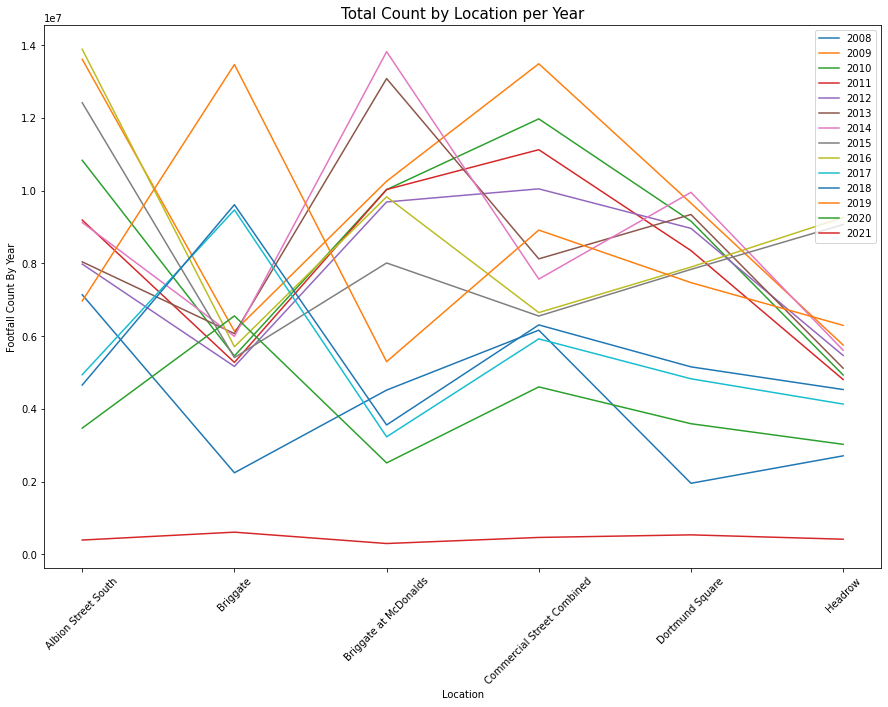

In [10]:
plt.rcParams["figure.figsize"] = (15,10)
fig = plt.figure()
ax = fig.add_subplot()
for name,group in df_footfall_samp1.groupby(['Year']):
    group.plot.line(ax=ax, x="Location",y="TotCountByLocationByYear", label= str(name))
    ax.set_ylabel('Footfall Count By Year')
    ax.set_xlabel('Location')
    plt.title('Total Count by Location per Year', fontsize=15)
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [11]:
df_footfall['TotCountByWeekDayByYear'] = (df_footfall.groupby(['WeekDay', 'Year'])['Count'].transform('sum'))

df_footfall.info()
df_footfall.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629424 entries, 0 to 793557
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Location                  629424 non-null  object        
 1   LocationYear              629424 non-null  object        
 2   LocationYearMonth         629424 non-null  object        
 3   Count                     629424 non-null  int64         
 4   DateTime                  629424 non-null  datetime64[ns]
 5   Date                      629424 non-null  datetime64[ns]
 6   Year                      629424 non-null  int64         
 7   YearMonth                 629424 non-null  period[M]     
 8   Month                     629424 non-null  int64         
 9   YearMonthDay              629424 non-null  object        
 10  MonthDay                  629424 non-null  int64         
 11  YearWeekDay               629424 non-null  object        
 12  We

,Location,LocationYear,LocationYearMonth,Count,DateTime,Date,Year,YearMonth,Month,YearMonthDay,...,YearMonthWeekDay,WeekDayName,IsWeekend,BRCWeekNum,BRCMonthNum,BRCMonth,BRCYear,NumRecords,TotCountByLocationByYear,TotCountByWeekDayByYear
0,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,3,2020-03-08 00:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-03-6,Sunday,True,32,8,August,2020,104904,3472463,2874119
1,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,6,2020-03-08 01:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-03-6,Sunday,True,32,8,August,2020,104904,3472463,2874119
2,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,1,2020-03-08 02:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-03-6,Sunday,True,32,8,August,2020,104904,3472463,2874119
3,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,30,2020-03-08 03:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-03-6,Sunday,True,32,8,August,2020,104904,3472463,2874119
4,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,20,2020-03-08 04:00:00,2020-03-08,2020,2020-03,3,2020-8,...,2020-03-6,Sunday,True,32,8,August,2020,104904,3472463,2874119


In [12]:
df_footfall_samp2 = df_footfall.drop_duplicates('YearWeekDay')
print(df_footfall_samp2.groupby(['WeekDay']).count())

         Location  LocationYear  LocationYearMonth  Count  DateTime  Date  \
WeekDay                                                                     
0              14            14                 14     14        14    14   
1              14            14                 14     14        14    14   
2              14            14                 14     14        14    14   
3              14            14                 14     14        14    14   
4              14            14                 14     14        14    14   
5              14            14                 14     14        14    14   
6              14            14                 14     14        14    14   

         Year  YearMonth  Month  YearMonthDay  ...  YearMonthWeekDay  \
WeekDay                                        ...                     
0          14         14     14            14  ...                14   
1          14         14     14            14  ...                14   
2          14     

In [13]:
df_footfall_samp2 = df_footfall_samp2[['WeekDayName', 'Year', 'TotCountByWeekDayByYear']]
df_footfall_samp3 = df_footfall_samp2.pivot(index='WeekDayName', columns='Year')

df_footfall_samp3.columns = df_footfall_samp3.columns.droplevel(0)
df_footfall_samp3.info()
df_footfall_samp3.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Friday to Wednesday
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2008    7 non-null      int64
 1   2009    7 non-null      int64
 2   2010    7 non-null      int64
 3   2011    7 non-null      int64
 4   2012    7 non-null      int64
 5   2013    7 non-null      int64
 6   2014    7 non-null      int64
 7   2015    7 non-null      int64
 8   2016    7 non-null      int64
 9   2017    7 non-null      int64
 10  2018    7 non-null      int64
 11  2019    7 non-null      int64
 12  2020    7 non-null      int64
 13  2021    7 non-null      int64
dtypes: int64(14)
memory usage: 840.0+ bytes


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
WeekDayName,,,,,,,,,,,,,,
Friday,3701144,8484499,8002178,7097123,7265434,7740955,7894251,7285429,7982506,5191893,5513419,7567708,3451921,375092
Monday,3525658,7602550,7179093,6597816,6618069,6510507,7101732,6244777,7176915,4469225,4701710,6602823,3237357,395276
Saturday,4762063,11269891,9467680,8510557,8309278,8933633,9202929,8840233,9059366,5340196,5195393,7917648,3836099,484429
Sunday,2647065,6417045,5425689,5630065,5481289,5671062,6255523,5983173,6365937,3866829,4127649,5758167,2874119,314981
Thursday,3301880,8612964,7772182,6926964,6985183,7078966,7352786,7118005,7688059,4597180,5286662,6879576,3633502,422934


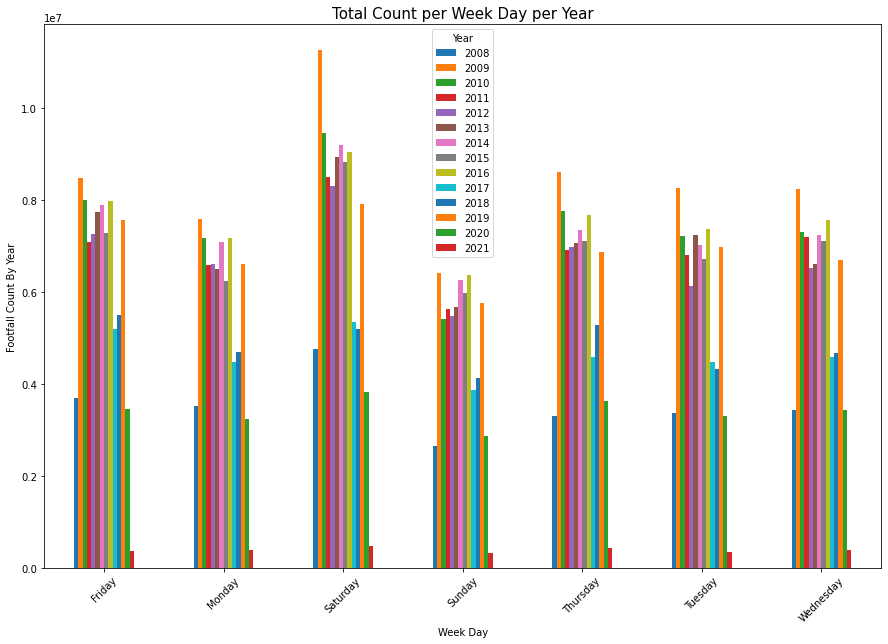

In [14]:
plt.rcParams["figure.figsize"] = (15,10)
fig = plt.figure()
ax = fig.add_subplot()
df_footfall_samp3.plot(ax=ax, kind='bar')
ax.set_ylabel('Footfall Count By Year')
ax.set_xlabel('Week Day')
plt.title('Total Count per Week Day per Year', fontsize=15)
ax.tick_params(axis='x', rotation=45)

plt.show()

In [15]:
df_footfall['TotCountByMonth'] = (df_footfall.groupby(['Month'])['Count'].transform('sum'))

df_footfall.info()
df_footfall.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629424 entries, 0 to 793557
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Location                  629424 non-null  object        
 1   LocationYear              629424 non-null  object        
 2   LocationYearMonth         629424 non-null  object        
 3   Count                     629424 non-null  int64         
 4   DateTime                  629424 non-null  datetime64[ns]
 5   Date                      629424 non-null  datetime64[ns]
 6   Year                      629424 non-null  int64         
 7   YearMonth                 629424 non-null  period[M]     
 8   Month                     629424 non-null  int64         
 9   YearMonthDay              629424 non-null  object        
 10  MonthDay                  629424 non-null  int64         
 11  YearWeekDay               629424 non-null  object        
 12  We

,Location,LocationYear,LocationYearMonth,Count,DateTime,Date,Year,YearMonth,Month,YearMonthDay,...,WeekDayName,IsWeekend,BRCWeekNum,BRCMonthNum,BRCMonth,BRCYear,NumRecords,TotCountByLocationByYear,TotCountByWeekDayByYear,TotCountByMonth
0,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,3,2020-03-08 00:00:00,2020-03-08,2020,2020-03,3,2020-8,...,Sunday,True,32,8,August,2020,104904,3472463,2874119,46229558
1,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,6,2020-03-08 01:00:00,2020-03-08,2020,2020-03,3,2020-8,...,Sunday,True,32,8,August,2020,104904,3472463,2874119,46229558
2,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,1,2020-03-08 02:00:00,2020-03-08,2020,2020-03,3,2020-8,...,Sunday,True,32,8,August,2020,104904,3472463,2874119,46229558
3,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,30,2020-03-08 03:00:00,2020-03-08,2020,2020-03,3,2020-8,...,Sunday,True,32,8,August,2020,104904,3472463,2874119,46229558
4,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,20,2020-03-08 04:00:00,2020-03-08,2020,2020-03,3,2020-8,...,Sunday,True,32,8,August,2020,104904,3472463,2874119,46229558


In [16]:
df_footfall_samp4 = df_footfall.drop_duplicates('Month')
print(df_footfall_samp4.groupby(['Month']).count())

       Location  LocationYear  LocationYearMonth  Count  DateTime  Date  Year  \
Month                                                                           
1             1             1                  1      1         1     1     1   
2             1             1                  1      1         1     1     1   
3             1             1                  1      1         1     1     1   
4             1             1                  1      1         1     1     1   
5             1             1                  1      1         1     1     1   
6             1             1                  1      1         1     1     1   
7             1             1                  1      1         1     1     1   
8             1             1                  1      1         1     1     1   
9             1             1                  1      1         1     1     1   
10            1             1                  1      1         1     1     1   
11            1             

In [17]:
df_footfall_samp4 = df_footfall_samp4[['Month', 'TotCountByMonth']]

df_footfall_samp4.info()
df_footfall_samp4.head(12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 6408
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Month            12 non-null     int64
 1   TotCountByMonth  12 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


,Month,TotCountByMonth
0,3,46229558
24,4,46642743
48,5,47713921
72,6,46215096
96,7,48630030
120,8,48873567
144,9,48168601
1296,10,48827868
1320,11,50962304
2496,12,57482126


## Time series 

In [18]:
df_footfall.set_index('DateTime', inplace=True)

In [19]:
df_footfall_covid = df_footfall[df_footfall['Year'] > 2019]
df_footfall_covid.info()
df_footfall_covid.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69264 entries, 2020-03-08 00:00:00 to 2021-04-04 23:00:00
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Location                  69264 non-null  object        
 1   LocationYear              69264 non-null  object        
 2   LocationYearMonth         69264 non-null  object        
 3   Count                     69264 non-null  int64         
 4   Date                      69264 non-null  datetime64[ns]
 5   Year                      69264 non-null  int64         
 6   YearMonth                 69264 non-null  period[M]     
 7   Month                     69264 non-null  int64         
 8   YearMonthDay              69264 non-null  object        
 9   MonthDay                  69264 non-null  int64         
 10  YearWeekDay               69264 non-null  object        
 11  WeekDay                   69264 non-null  int

,Location,LocationYear,LocationYearMonth,Count,Date,Year,YearMonth,Month,YearMonthDay,MonthDay,...,WeekDayName,IsWeekend,BRCWeekNum,BRCMonthNum,BRCMonth,BRCYear,NumRecords,TotCountByLocationByYear,TotCountByWeekDayByYear,TotCountByMonth
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-03-08 00:00:00,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,3,2020-03-08,2020,2020-03,3,2020-8,8,...,Sunday,True,32,8,August,2020,104904,3472463,2874119,46229558
2020-03-08 01:00:00,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,6,2020-03-08,2020,2020-03,3,2020-8,8,...,Sunday,True,32,8,August,2020,104904,3472463,2874119,46229558
2020-03-08 02:00:00,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,1,2020-03-08,2020,2020-03,3,2020-8,8,...,Sunday,True,32,8,August,2020,104904,3472463,2874119,46229558
2020-03-08 03:00:00,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,30,2020-03-08,2020,2020-03,3,2020-8,8,...,Sunday,True,32,8,August,2020,104904,3472463,2874119,46229558
2020-03-08 04:00:00,Albion Street South,Albion Street South-2020,Albion Street South-2020-03,20,2020-03-08,2020,2020-03,3,2020-8,8,...,Sunday,True,32,8,August,2020,104904,3472463,2874119,46229558


In [20]:
df_footfall_noncovid = df_footfall[df_footfall['Year'] <= 2019]
df_footfall_noncovid.info()
df_footfall_noncovid.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 560160 entries, 2008-08-27 00:00:00 to 2016-11-30 23:00:00
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Location                  560160 non-null  object        
 1   LocationYear              560160 non-null  object        
 2   LocationYearMonth         560160 non-null  object        
 3   Count                     560160 non-null  int64         
 4   Date                      560160 non-null  datetime64[ns]
 5   Year                      560160 non-null  int64         
 6   YearMonth                 560160 non-null  period[M]     
 7   Month                     560160 non-null  int64         
 8   YearMonthDay              560160 non-null  object        
 9   MonthDay                  560160 non-null  int64         
 10  YearWeekDay               560160 non-null  object        
 11  WeekDay                   56016

,Location,LocationYear,LocationYearMonth,Count,Date,Year,YearMonth,Month,YearMonthDay,MonthDay,...,WeekDayName,IsWeekend,BRCWeekNum,BRCMonthNum,BRCMonth,BRCYear,NumRecords,TotCountByLocationByYear,TotCountByWeekDayByYear,TotCountByMonth
DateTime,,,,,,,,,,,,,,,,,,,,,
2008-08-27 00:00:00,Albion Street South,Albion Street South-2008,Albion Street South-2008-08,45,2008-08-27,2008,2008-08,8,2008-27,27,...,Wednesday,False,35,8,August,2008,104904,7138435,3425728,48873567
2008-08-27 01:00:00,Albion Street South,Albion Street South-2008,Albion Street South-2008-08,21,2008-08-27,2008,2008-08,8,2008-27,27,...,Wednesday,False,35,8,August,2008,104904,7138435,3425728,48873567
2008-08-27 02:00:00,Albion Street South,Albion Street South-2008,Albion Street South-2008-08,23,2008-08-27,2008,2008-08,8,2008-27,27,...,Wednesday,False,35,8,August,2008,104904,7138435,3425728,48873567
2008-08-27 03:00:00,Albion Street South,Albion Street South-2008,Albion Street South-2008-08,40,2008-08-27,2008,2008-08,8,2008-27,27,...,Wednesday,False,35,8,August,2008,104904,7138435,3425728,48873567
2008-08-27 04:00:00,Albion Street South,Albion Street South-2008,Albion Street South-2008-08,50,2008-08-27,2008,2008-08,8,2008-27,27,...,Wednesday,False,35,8,August,2008,104904,7138435,3425728,48873567


plt.rcParams["figure.figsize"] = (15,10)
fig = plt.figure()
ax = fig.add_subplot()

for name,group in df_footfall_noncovid.groupby(['Location', 'Date']):
    ts = group['Count']
    ts.plot.line(ax, label='Original')
    
plt.legend(loc='best')
ax.set_ylabel('Count')
ax.set_xlabel('DateTime')
ax.tick_params(axis='x', rotation=45)
plt.show()

In [51]:
def hour_counts(grp):
    max = grp.loc[grp['Count'] == grp['Count'].max(), 'Count'].iloc[0]
    avg = grp['Count'].mean()
    print('mean: ' + str(avg) + ', max')
    return grp

df_footfall_noncovid.groupby(['Location', 'Date']).apply(hour_counts)

10059
7465
12766
11033
8716
8145
4758
9113
7811
9374
9469
10274
7621
14599
9143
8756
6309
6011
10083
10427
10705
9697
8993
16667
4736
7795
8976
7803
8426
8920
14527
12469
9624
10411
9873
11012
4082
6913
8994
5108
12620
10614
4229
8188
8141
8294
9629
7738
11865
5900
8742
8955
8241
8760
9215
13346
5658
8232
7730
8399
9206
8976
11724
8158
7767
8275
8620
9261
15038
4814
8233
8244
8247
7824
9335
12345
5037
11899
12189
11341
11301
13835
7672
13903
8171
12418
8788
10206
15868
6350
9190
9751
9387
9592
9219
15882
8454
9605
9411
9932
9479
11852
18247
8626
7954
5529
9126
13100
16579
12487
14232
14313
14381
14308
15316
17573
12806
23268
16127
11574
93
7839
15432
9831
16658
14355
10026
820
5582
3651
7719
8003
8844
8408
7461
8713
6318
2042
8746
6522
6645
5370
7186
8643
5821
7318
8149
7457
7567
8098
12480
4430
8937
8055
8277
7363
8106
10691
12087
7411
6583
7891
10334
7872
8157
3581
7805
7056
5571
9104
10564
11834
4213
9353
9741
8350
10414
9660
9407
3300
6855
6729
7566
6662
7998
12184
9030
6827
5783
7

5246
2429
2699
3958
1617
2819
3866
2857
2434
2995
4106
2202
2421
3324
3231
2441
2223
3890
1975
3072
2808
3005
2889
3593
3544
2224
3520
3811
2662
4801
7038
3949
2118
3426
3764
2902
3205
3266
2989
1738
2444
2203
3520
2706
3356
3274
1860
1984
3178
3076
3143
2518
2482
4257
2835
3627
3513
3324
1795
3927
4246
3379
4220
3398
3325
4135
3235
2096
2924
3295
3973
3709
3084
3370
2291
2203
4283
3123
3281
3800
3489
2925
2833
2453
4614
2428
1905
3413
3106
3833
2803
8941
3209
2702
4658
1622
2758
2652
3728
2427
2971
4486
2374
2831
3082
2969
3199
3616
4987
2516
3142
3011
697
1100
5591
2495
2309
2153
2844
2753
2926
3449
4020
2038
2327
3968
2660
4880
3849
8629
3004
1950
2623
4217
5065
3879
6820
2562
3493
5179
4970
5377
2845
2345
2362
4266
4191
2251
3664
1526
2340
3165
3008
4557
3411
3942
4510
11301
4730
3343
2891
3313
3619
4450
4521
3358
2943
4070
4355
4892
5459
8529
2540
2837
2934
3840
1651
2476
3037
3100
2812
7349
3146
3956
5294
8426
2701
4142
3906
4940
2040
3443
10148
3605
3313
4157
77
4308
7293
6767
1

3016
2930
3176
3708
2494
2336
2342
1604
2342
2514
2537
3105
3354
2604
2610
1959
2371
2545
2480
2328
3459
2830
2985
2930
2946
3466
2807
2758
2245
3065
2381
3608
3513
2905
2926
2784
3139
2729
3149
2744
2739
1895
2523
1934
2418
2901
2908
2947
3263
3155
3327
3913
3402
3838
3746
3761
3513
2880
3244
56
2499
3226
3267
2905
2307
2724
924
2526
2698
2507
2673
2691
2694
2687
2235
3448
3121
3067
1761
2314
2313
2456
2558
2365
2780
1893
2395
2507
2455
2758
2890
2875
2134
2670
2365
2519
2191
2937
2539
2881
2495
2563
1891
2623
2757
2625
2720
3018
3334
2823
2615
2743
2904
2000
2692
2543
2649
2846
2864
2892
1980
2401
2601
2642
2689
2561
2098
1666
2461
2553
2575
2580
2717
2694
2736
2489
3179
2398
2502
2553
2477
2032
2405
2517
2712
2433
2544
3042
1936
2604
2609
2771
2882
3156
3254
1867
2636
2444
2430
2364
2670
2623
2565
2798
2388
3131
2644
3444
2737
1493
2450
2475
2454
2551
2291
2484
925
1694
2408
2328
2390
2548
2487
2147
2679
2595
2833
2513
2391
2513
1976
2459
2680
2493
2557
3715
2738
3272
2492
2400
2569

2606
3150
2913
3987
3189
4912
4443
8347
5375
2235
2849
5944
3645
6805
4304
2286
5585
2281
5666
3283
9194
4519
6029
6206
6239
6324
6899
8443
2650
4270
1159
1987
3218
4133
3713
5417
4169
3264
3621
3541
4081
3686
3393
3309
4528
1597
1575
3008
5273
2044
2057
2374
1559
1987
3339
3318
1242
4990
6897
3189
5374
7944
4860
2422
2734
4270
3807
3719
8308
8097
2268
3502
2218
3706
2919
3040
5841
2661
3895
4286
3524
3033
4216
5954
3846
3967
3642
4385
2752
4857
3586
6527
2972
4458
4416
2988
3885
2517
7254
2558
4694
3232
2827
3304
4670
2452
3724
3705
4013
2522
3722
6466
3527
3642
4452
3889
2139
3910
6744
6064
2347
4875
3986
3453
2902
6035
3798
3567
6767
4581
5613
3251
6211
3017
3126
4164
4022
2515
3648
6332
3218
3924
4554
3693
2963
3443
5784
2737
3577
4434
2772
2763
2662
745
3588
3316
2876
4294
5703
2524
6857
9657
3773
4217
3856
3097
3671
5596
3490
4306
4151
4244
3036
3428
5330
4312
3707
4134
3648
2952
3652
5603
1575
3323
2069
2865
5280
3296
2722
3601
3737
5208
5865
2942
3247
7933
3690
3796
4034
4117
2

4725
4949
4870
4977
5725
7323
5226
4491
5386
5333
4970
5328
3874
4258
3775
3703
3261
4064
4290
5255
6934
4740
4842
9417
3923
5110
7785
4688
4643
4505
4601
5445
5784
7722
6268
6204
6377
6066
6612
6461
7988
5758
5746
3731
3938
4145
4907
4146
5947
3904
4928
4502
4218
5235
7050
6413
4776
4823
4813
3463
5089
8168
6020
4188
4956
6061
5501
8340
10134
8199
5850
4986
6287
3674
4431
6679
3787
4685
3687
4292
5107
4869
4606
8261
5864
5736
5443
6284
7496
8505
8565
8184
7717
7682
7836
7949
5923
234
7696
8756
8615
8124
7812
6665
1606
3913
4360
7793
5261
5993
6950
5011
4088
6804
3847
2855
4385
4051
4346
5494
6685
5257
3876
4683
4718
3511
4177
7077
5003
3843
3113
5708
4008
4270
4904
4553
5323
4643
4455
5551
5832
4732
4696
5090
7263
4390
4597
4520
4864
3583
5536
6444
4219
3209
3869
5357
7529
3993
4973
4585
6638
4742
4836
3743
4122
4633
4157
4454
7073
4170
3693
3942
3313
4878
4975
8904
4424
3777
4079
3983
4434
5144
5436
7164
7516
4775
4448
4164
4124
5241
5815
5761
6053
1454
4917
5304
4862
4794
4754
6000


1854
1941
1914
2249
1993
1799
1739
1811
2103
1796
2036
2139
2135
1519
1752
1624
1689
1988
2464
2112
1441
2455
1730
2104
2347
3446
2120
1568
1431
1575
1702
1424
2085
2039
1614
1953
2015
1744
1955
2182
1988
1828
2241
1741
1881
2070
2533
2041
1936
2221
1896
2180
1877
2220
1899
1889
1825
1680
1263
1841
2006
2119
1878
1853
1434
1948
1567
1799
1990
2082
2107
1983
1969
2096
2792
1764
1956
2618
3014
3038
2692
2263
194
1554
2807
2352
3158
2451
2097
968
1567
1567
2078
1561
2152
2007
1963
2147
2064
1720
2321
1811
1865
1655
1373
1419
1954
1834
1896
1923
2406
1699
1673
1896
1716
1805
2117
2278
1738
1838
1429
1862
1881
2169
1672
2195
2089
2002
2122
1731
2043
2412
1221
1938
1929
1738
1939
1916
1574
1644
1421
2192
1744
1920
2273
2239
1557
1879
1961
1697
2085
1438
2045
1938
1722
1969
2252
1715
2114
2174
1454
1710
1845
1873
1946
1769
2292
1631
1828
1483
1543
1994
2183
2407
1467
1978
1969
1747
1985
1992
1654
1733
1721
1980
2116
2104
1765
1637
2025
2070
1763
2026
1914
1792
1865
1568
1788
1907
1920
2456
17

2299
2150
1951
2389
2035
2063
2638
1436
2187
1810
1967
1647
1782
2377
1454
1641
1493
1332
1460
1477
1397
1489
1007
1258
1651
1866
1511
1736
2793
1502
1462
1755
2288
1359
1271
1242
1445
1574
1647
2424
1447
1402
1820
1860
1774
1696
2382
1466
2729
2030
1902
1672
1036
2142
1339
1764
1689
1747
2326
2169
1108
1640
1589
1359
1614
1516
2163
1257
1375
1482
1559
1625
1595
2344
1288
1574
1592
1344
2362
2859
1859
1485
1560
1295
1881
1976
1262
2448
2939
1132
1490
1738
1593
1552
2170
1375
1667
1763
1798
1961
1972
2267
1127
1722
1730
1821
1749
1959
1774
1574
1876
2008
1574
1527
1277
2156
1607
1564
1476
1930
1867
1385
2344
1688
1808
1620
2054
1826
1846
2147
1671
1881
2030
2090
1923
2111
2394
1705
2327
2046
1191
2146
2052
1428
1594
1430
1608
2606
1327
2098
1858
1542
1701
1881
1691
1790
2680
1787
1544
1876
1683
1697
1871
2698
1610
1847
1868
1680
2150
1481
1617
2298
1314
1638
1676
1627
1681
2583
2113
1924
1603
1670
1697
1762
2451
1278
1783
1472
1502
1756
1819
2336
1665
2272
2019
1606
2045
2197
2654
1211


8672
3938
6260
8426
7115
6357
3901
5681
9294
3604
8287
7540
7867
8414
8166
4178
8145
7401
8025
6798
6900
9252
3466
4640
5240
7157
5376
8616
4425
8174
3160
5305
6818
4121
6833
7096
5910
6583
17504
5198
5420
4457
8695
3159
5574
5485
7664
6182
6991
8573
3747
3479
8948
6473
7773
9001
8055
3416
7731
7486
8501
6751
5417
7635
5796
7115
3585
4329
6693
7544
7294
3126
4303
6225
5694
6687
6717
8571
3319
5530
6646
7162
7649
7690
9409
3999
7551
6918
6587
10315
10915
7374
8148
2904
5615
6556
7416
6956
11821
9337
6320
6513
5528
7541
5611
8565
3586
7975
7029
7910
8033
7503
8764
3637
8113
7413
6175
7250
8123
6788
3673
2553
6144
5336
5317
6594
7228
5707
7924
4161
8201
6170
6699
7823
3721
6679
6948
6975
5056
5611
7395
3138
5996
7706
5757
7047
6129
7483
3619
4451
6792
7233
7186
6861
7141
6737
6116
3184
6315
6338
7252
7645
3242
5658
5921
5525
5812
5772
8321
4058
5697
5907
6039
6768
6300
8937
4029
6244
6442
6201
10072
9318
7506
5095
3131
5740
6477
6100
6366
9311
5712
6967
6421
5965
5829
7244
9796
3906
5179


3655
3431
4158
3695
4148
596
2776
2808
3838
4142
2906
4911
2311
4002
3653
3589
1983
2115
3243
3668
3235
3624
4794
3285
2643
2437
2724
3404
3503
3623
3429
3813
5484
2235
3384
3408
3324
2889
2857
3018
2269
3195
4246
2847
3278
4153
4356
3020
3334
3081
2297
3566
3919
2678
2780
3380
1994
2994
7254
3925
6221
2030
3219
3651
4371
3518
3479
4552
2655
3419
2683
3226
3661
3295
3813
2566
3511
2929
3134
4137
2938
3157
3019
3693
3916
3845
2172
3910
3211
2834
3268
3383
3182
4353
3114
3857
2572
3886
3598
3797
3894
4156
4567
3667
3613
3460
3405
3881
2853
4600
5879
3431
2736
2763
3282
3203
2942
2217
3773
3296
2878
3108
2570
3811
2832
2958
3804
3543
3571
3272
3105
2192
1270
3717
3414
3579
3261
3709
2179
3183
1841
2715
3600
3056
2400
3620
4091
3282
2748
2645
4289
3662
1687
2396
2728
2430
2605
2996
3679
2201
2887
3158
3399
3003
3248
4005
2580
2484
3773
2941
3607
4819
3748
4280
3626
3670
1171
2678
3431
3251
2529
1842
2480
2648
2990
3115
4366
2227
2543
2364
2483
3227
3334
4426
2458
4362
4150
3810
3098
3616
3

954
1411
1089
1362
1418
1452
1853
993
1443
1067
1223
1594
1468
3773
1532
927
1260
1380
1335
1602
727
1496
1314
1109
1173
1706
1518
768
1900
1174
1524
1905
2010
1301
1572
916
3770
1408
1369
1666
806
1586
1114
991
1281
1272
1942
1066
1737
2900
3195
3335
4322
5514
2872
1174
644
1206
3548
4456
3303
3575
3947
3457
4251
3939
4765
3292
4896
4653
3899
65
2428
4311
2124
4106
3594
3825
486
2370
2290
3582
4056
3732
3414
3696
3615
3417
2709
3871
2052
2458
2544
2486
4295
1794
2724
2679
2715
2700
2976
4090
1884
3297
3015
3111
2910
3987
5364
3485
3157
2872
3964
4728
3640
3325
2893
3254
3737
3567
6342
4206
4781
2150
3407
4086
3923
4080
3881
4485
2094
3570
3648
3445
2804
3389
4693
3225
3165
2894
4096
2782
3340
2860
3817
2656
5214
3782
5107
3191
4237
2255
3142
3458
3658
3225
4077
4941
1634
3302
3229
3459
3781
3387
4208
2985
2563
3189
1447
2858
3120
4303
2434
2749
4459
3156
2935
4011
2886
5614
2495
3582
3159
3221
3996
4011
3075
4334
3998
4222
3534
3209
4540
2317
2578
2934
3867
2872
2630
2713
3220
2660
26

7509
4417
3556
2783
2919
3444
2497
2885
3901
2905
2243
5357
2372
2539
3270
3309
2646
2768
6326
2249
1960
2228
2434
2640
2739
5717
2176
2469
2902
4056
3256
3950
4478
2518
4938
4730
2997
2479
2645
4208
2091
1842
1717
2409
2349
1885
3697
1081
1312
1369
1762
2023
3196
4790
2391
1541
2571
2692
2919
2800
3871
2985
4587
7768
3415
4496
1951
2145
2380
1718
3902
2401
2635
2578
4560
2920
1915
2538
1993
2053
2695
3879
1660
1762
1884
2640
1962
4141
8179
4336
4825
3683
4243
3656
4022
3333
2534
2709
4824
2746
3851
4174
7599
3875
3489
4638
4140
4824
4298
4758
5798
3827
3688
59
2637
2665
3505
2418
2732
2219
533
5851
7739
4229
4421
2491
2996
2593
3341
4250
3070
3606
1797
2732
2896
2246
2600
4198
1838
2305
2341
2666
2653
3023
5487
2998
3128
3277
3679
3430
4005
2757
3697
4007
3857
3739
5008
4159
3585
3846
3905
2192
3344
4474
4114
5120
4186
3314
4001
4344
4080
5162
6873
3889
3673
4000
4911
4675
4109
2370
2707
3383
5120
8237
4137
3719
3401
3994
4148
3010
3401
4782
4165
7541
5039
4369
3597
4279
4761
3742
640

2768
3006
132
2579
2903
2757
2465
1904
2328
706
2142
2207
2704
2406
2419
2479
2869
2364
2361
2246
2706
1461
2412
2370
2211
2223
2112
2368
1670
2351
2273
2257
2272
2256
2940
1730
2399
2204
2294
2179
2499
2698
2568
2214
2600
1540
2473
2472
2628
4405
2292
2867
2437
2417
2300
2865
1567
2552
2534
2625
2662
2766
3060
1735
2360
2644
2615
2325
2455
1735
1367
2935
2230
3016
2785
2625
2642
2476
1734
2693
3949
2657
4087
1913
2237
2719
2337
3791
2296
2387
3003
2242
4892
2441
2398
4786
4470
4157
1691
2317
2303
2868
2581
2966
2375
3017
2962
3171
2279
2370
2597
2724
1338
3484
2366
3894
3540
2897
3444
1247
2243
3746
3311
2184
2261
2373
1714
3437
3518
2415
2412
2954
2634
1760
2427
2198
3220
3075
2701
2443
2696
3379
3421
3365
2981
2793
2575
1542
2366
3084
2382
2481
3324
2261
1587
1883
2892
2477
2274
2506
1659
2398
2161
3520
1609
2915
2889
3356
2988
1710
2341
2434
2206
2228
2577
1588
2289
2363
2393
2912
2518
2755
1540
2172
2168
2332
3274
3017
2545
1923
2292
2144
2106
1723
2356
2218
1736
3053
2667
2665
18

1882
1821
1988
1471
2428
1331
1913
1911
3506
1718
2527
1792
1871
1877
2375
1293
1861
1755
1758
1660
1662
2692
1233
1765
1872
1787
1661
1956
2564
2779
1859
1701
2354
1562
1936
2821
2046
1840
1934
1897
2936
1686
2704
1430
1681
1854
1782
2424
1790
2459
1306
2177
2060
2080
1884
2046
2232
1165
1776
1829
1444
1788
1707
574
1787
2220
1472
2024
2570
1882
2370
5011
2011
2173
2037
2251
1927
2366
1244
2043
2234
2089
2248
2253
2331
1534
1448
2254
2085
2136
2329
2232
1620
1866
1416
1742
2174
1785
2005
1560
1907
2297
2907
2128
1994
3155
1954
2246
2116
2171
2162
2144
3668
1750
1537
1848
2329
2230
2752
3616
1877
1930
1710
3088
2058
1684
1307
1710
1845
2187
1953
4407
2808
3952
1795
1909
1640
2000
1926
2187
3556
1785
1989
2053
2230
2153
2268
3240
1893
2834
2718
2890
2057
2857
1577
2034
1563
1666
1745
2023
2041
2042
2103
2730
2617
2316
2421
2390
4672
2622
1917
2266
2003
2162
2718
5066
2547
2152
2060
2313
2334
2842
1746
1711
1802
2149
2560
1911
1737
1281
1843
2161
2001
2625
2552
2127
5658
3512
3052
2834
2

2323
2409
2392
1859
2527
2622
1544
2263
2401
2494
2448
2154
2593
2136
2478
2185
2304
2152
2392
2405
2297
2290
2712
1545
2405
2229
3201
2436
2817
3092
1522
2112
2120
2041
2284
2542
2414
3153
2933
2139
2129
1431
2246
2252
2553
1953
2336
665
1669
2499
2095
2213
2104
2398
1469
2142
1944
2055
2107
2360
2747
1673
2347
1684
1238
2275
2270
2815
2156
2370
2443
1435
2327
1608
1805
2419
2143
3844
1543
2243
2202
2088
2369
2507
2483
1697
1572
2455
2337
2162
2316
2532
2115
2366
1813
2210
2443
2259
2176
2235
2231
2785
1394
2185
2146
2058
2036
2140
2606
1520
2242
1999
1649
2158
2316
2591
2376
2214
2162
1353
2182
2127
2256
2072
2113
2463
1558
2140
2180
2055
1832
2249
2461
1554
2240
2244
2777
2127
2394
2452
1577
1482
2201
2347
2606
2029
2017
2569
1845
1474
2196
2524
2312
2380
2118
2344
1465
2290
2275
2052
2497
2479
2437
1631
1569
2355
2363
2465
1956
2159
2587
1470
2168
2079
1604
2177
2313
2327
2325
2250
2087
2331
2011
2254
2018
2517
2735
2193
2082
2727
1928
2238
2041
1072
1740
2139
2069
2082
2285
2307
8

,Location,LocationYear,LocationYearMonth,Count,Date,Year,YearMonth,Month,YearMonthDay,MonthDay,...,WeekDayName,IsWeekend,BRCWeekNum,BRCMonthNum,BRCMonth,BRCYear,NumRecords,TotCountByLocationByYear,TotCountByWeekDayByYear,TotCountByMonth
DateTime,,,,,,,,,,,,,,,,,,,,,
2008-08-27 00:00:00,Albion Street South,Albion Street South-2008,Albion Street South-2008-08,45,2008-08-27,2008,2008-08,8,2008-27,27,...,Wednesday,False,35,8,August,2008,104904,7138435,3425728,48873567
2008-08-27 00:00:00,Briggate,Briggate-2008,Briggate-2008-08,72,2008-08-27,2008,2008-08,8,2008-27,27,...,Wednesday,False,35,8,August,2008,104904,4517164,3425728,48873567
2008-08-27 00:00:00,Briggate at McDonalds,Briggate at McDonalds-2008,Briggate at McDonalds-2008-08,37,2008-08-27,2008,2008-08,8,2008-27,27,...,Wednesday,False,35,8,August,2008,104904,2244448,3425728,48873567
2008-08-27 00:00:00,Commercial Street Combined,Commercial Street Combined-2008,Commercial Street Combined-2008-08,25,2008-08-27,2008,2008-08,8,2008-27,27,...,Wednesday,False,35,8,August,2008,104904,6164618,3425728,48873567
2008-08-27 00:00:00,Dortmund Square,Dortmund Square-2008,Dortmund Square-2008-08,25,2008-08-27,2008,2008-08,8,2008-27,27,...,Wednesday,False,35,8,August,2008,104904,1956084,3425728,48873567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-30 23:00:00,Briggate,Briggate-2016,Briggate-2016-11,325,2016-11-30,2016,2016-11,11,2016-30,30,...,Wednesday,False,48,12,December,2016,104904,13883910,7580404,50962304
2016-11-30 23:00:00,Briggate at McDonalds,Briggate at McDonalds-2016,Briggate at McDonalds-2016-11,166,2016-11-30,2016,2016-11,11,2016-30,30,...,Wednesday,False,48,12,December,2016,104904,5709336,7580404,50962304
2016-11-30 23:00:00,Commercial Street Combined,Commercial Street Combined-2016,Commercial Street Combined-2016-11,109,2016-11-30,2016,2016-11,11,2016-30,30,...,Wednesday,False,48,12,December,2016,104904,9830408,7580404,50962304


In [21]:
from statsmodels.tsa.stattools import adfuller

def plot(ts, name, sec, choice):
    
    plt.rcParams["figure.figsize"] = (15,10)
    fig = plt.figure()
    ax = fig.add_subplot()
    ts.plot.line(ax, color='blue',label='Original')
    
    if 'rolmean' in choice:
        rolmean = ts.rolling(sec).mean()
        rolmean.plot.line(ax, color='red', label='Rolling Mean')
    if 'rolstd' in choice:
        rolstd = ts.rolling(sec).std()
        rolstd.plot.line(ax, color='black', label = 'Rolling Std')
    if 'expmean' in choice:
        expmean = ts.ewm(sec).mean()
        expmean.plot.line(ax, color='green', label = 'Exp Mean')
        
        
    plt.legend(loc='best')
    ax.set_ylabel('Count')
    ax.set_xlabel('DateTime')
    plt.title(str(name), fontsize=15)
    ax.tick_params(axis='x', rotation=45)
    plt.show()

def test_stationarity(ts, name, sec, choice):
    
    plot(ts, name, sec, choice)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [22]:
dc = {}

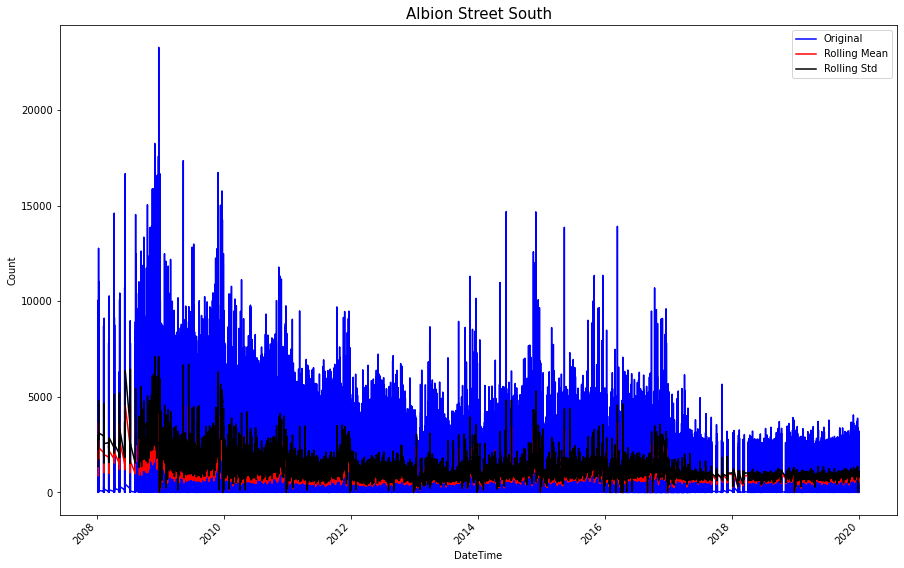

Results of Dickey-Fuller Test:
Test Statistic                   -18.970188
p-value                            0.000000
#Lags Used                        67.000000
Number of Observations Used    93292.000000
Critical Value (1%)               -3.430420
Critical Value (5%)               -2.861571
Critical Value (10%)              -2.566786
dtype: float64


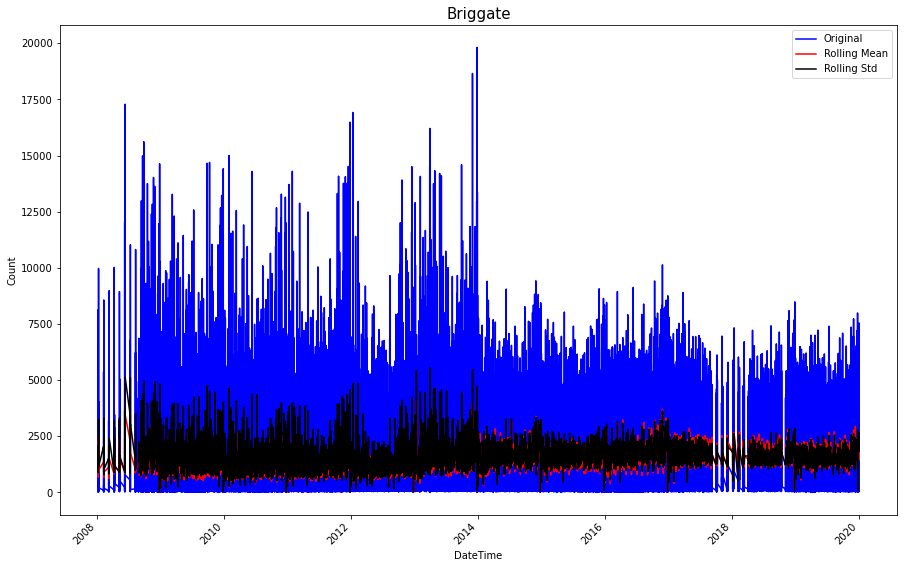

Results of Dickey-Fuller Test:
Test Statistic                   -29.085843
p-value                            0.000000
#Lags Used                        67.000000
Number of Observations Used    93292.000000
Critical Value (1%)               -3.430420
Critical Value (5%)               -2.861571
Critical Value (10%)              -2.566786
dtype: float64


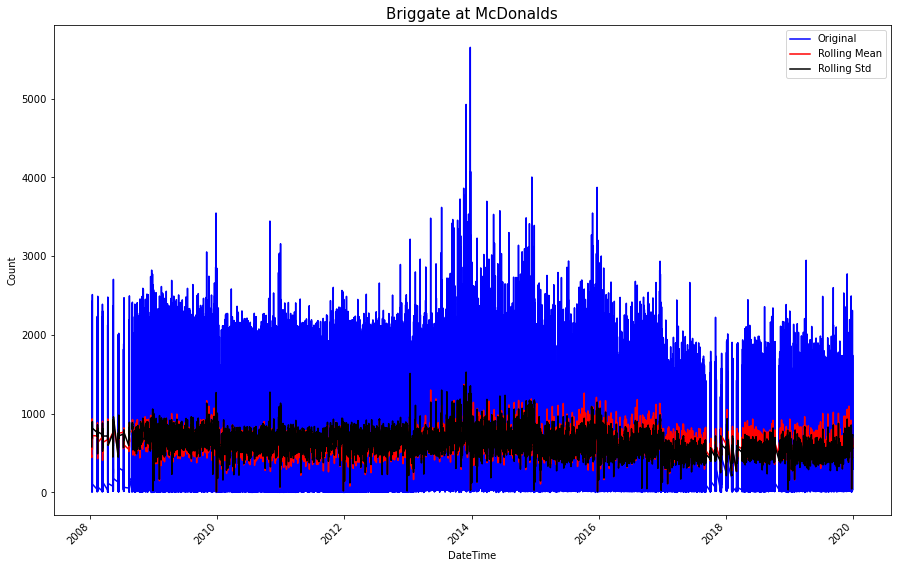

Results of Dickey-Fuller Test:
Test Statistic                   -27.734674
p-value                            0.000000
#Lags Used                        67.000000
Number of Observations Used    93292.000000
Critical Value (1%)               -3.430420
Critical Value (5%)               -2.861571
Critical Value (10%)              -2.566786
dtype: float64


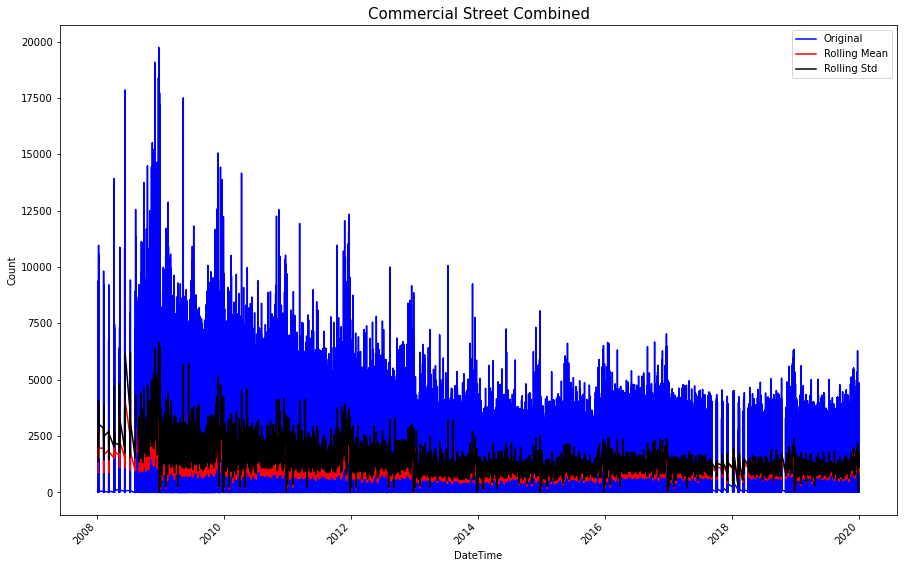

Results of Dickey-Fuller Test:
Test Statistic                   -20.419726
p-value                            0.000000
#Lags Used                        67.000000
Number of Observations Used    93292.000000
Critical Value (1%)               -3.430420
Critical Value (5%)               -2.861571
Critical Value (10%)              -2.566786
dtype: float64


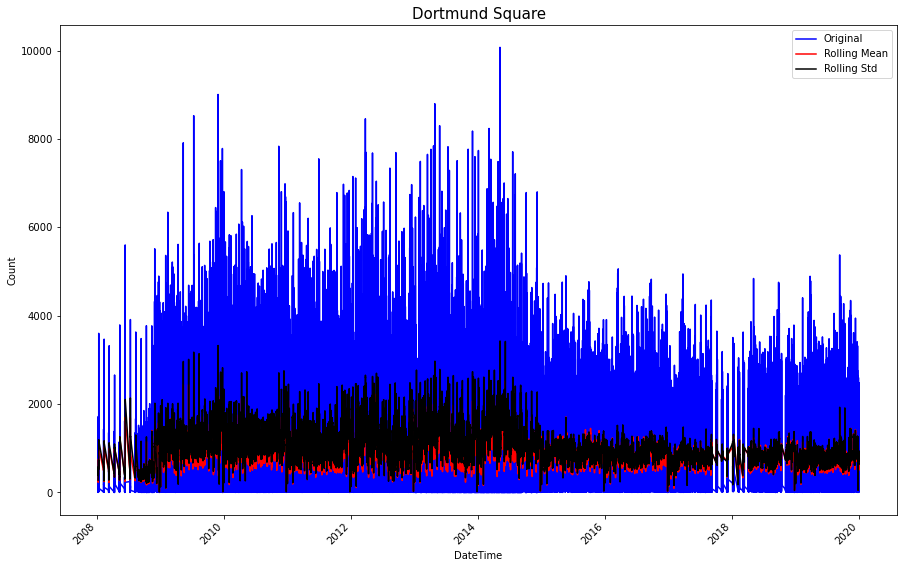

Results of Dickey-Fuller Test:
Test Statistic                   -20.333905
p-value                            0.000000
#Lags Used                        67.000000
Number of Observations Used    93292.000000
Critical Value (1%)               -3.430420
Critical Value (5%)               -2.861571
Critical Value (10%)              -2.566786
dtype: float64


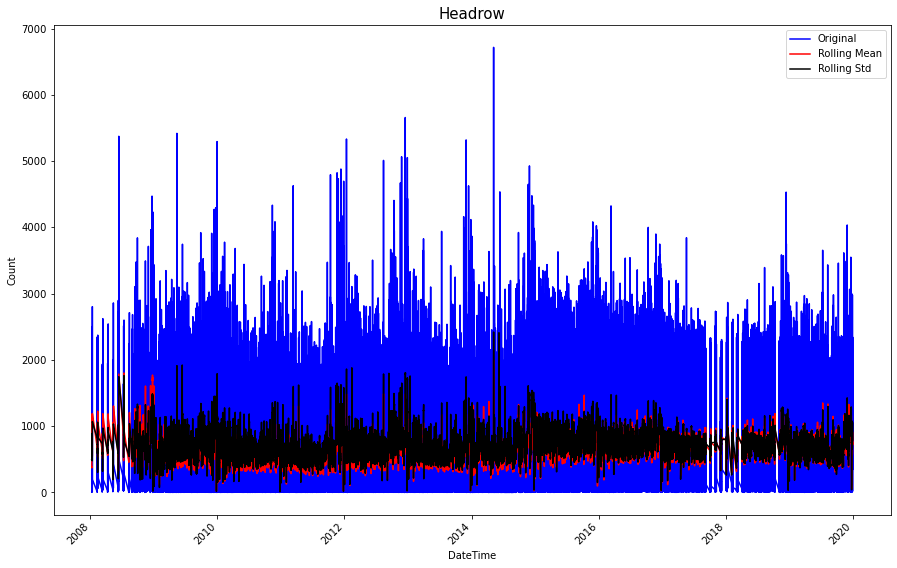

Results of Dickey-Fuller Test:
Test Statistic                   -21.476777
p-value                            0.000000
#Lags Used                        67.000000
Number of Observations Used    93292.000000
Critical Value (1%)               -3.430420
Critical Value (5%)               -2.861571
Critical Value (10%)              -2.566786
dtype: float64


In [23]:
for name,group in df_footfall_noncovid.groupby(['Location']):
    ts = group['Count']
    dc[name] = ts
    test_stationarity(ts, name, 24, set(['rolmean', 'rolstd']))

In [24]:
for name,group in df_footfall_noncovid.groupby(['LocationYear']):
    ts = group['Count']
    dc[name] = ts

In [25]:
for name,group in df_footfall_noncovid.groupby(['LocationYearMonth']):
    ts = group['Count']
    dc[name] = ts

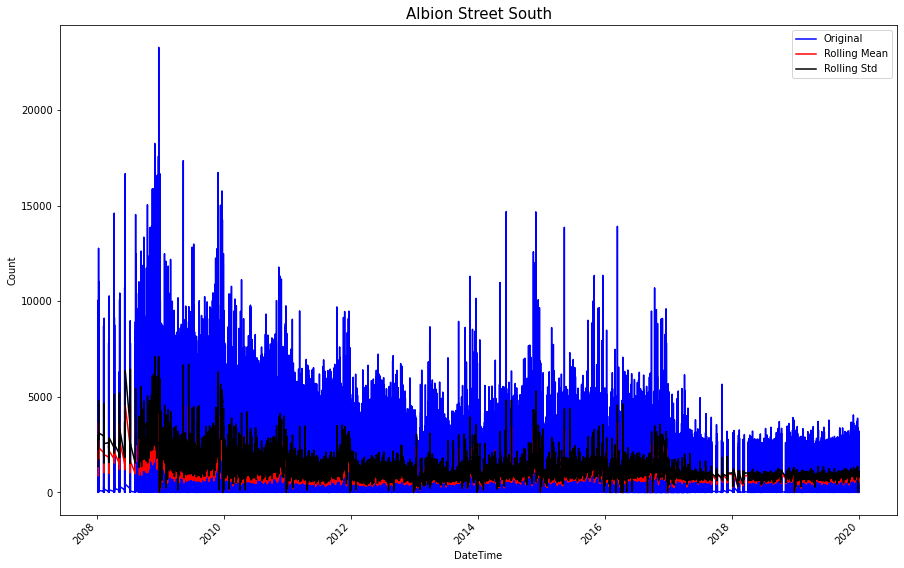

Results of Dickey-Fuller Test:
Test Statistic                   -18.970188
p-value                            0.000000
#Lags Used                        67.000000
Number of Observations Used    93292.000000
Critical Value (1%)               -3.430420
Critical Value (5%)               -2.861571
Critical Value (10%)              -2.566786
dtype: float64


In [26]:
test_stationarity(dc['Albion Street South'], 'Albion Street South', 24, set(['rolmean', 'rolstd']))

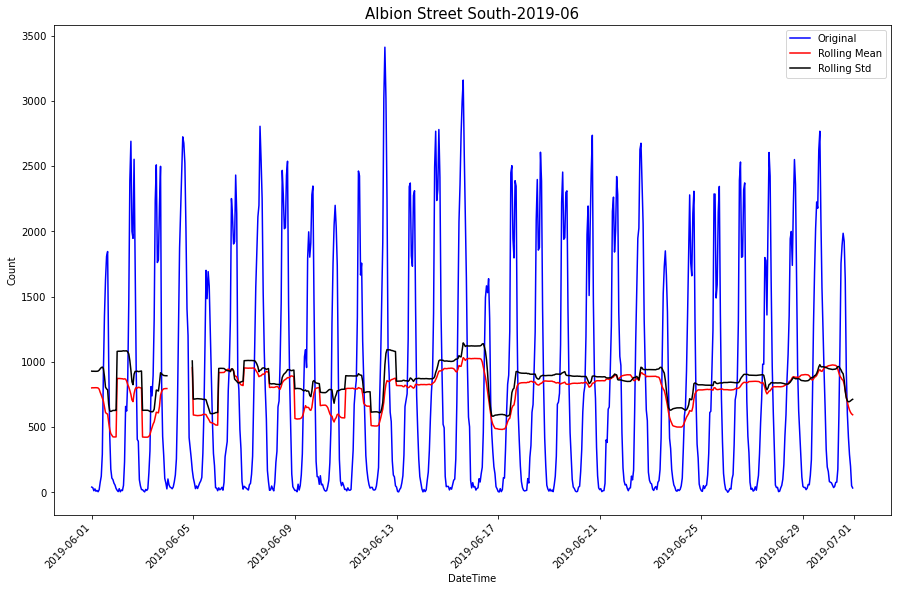

Results of Dickey-Fuller Test:
Test Statistic                  -5.018577
p-value                          0.000020
#Lags Used                      20.000000
Number of Observations Used    699.000000
Critical Value (1%)             -3.439740
Critical Value (5%)             -2.865684
Critical Value (10%)            -2.568977
dtype: float64


In [27]:
test_stationarity(dc['Albion Street South-2019-06'], 'Albion Street South-2019-06', 24, set(['rolmean', 'rolstd']))

In [28]:
dc_log = {}
for key, value in dc.items():
    dc_log[key] = np.log(value)

C:\ProgramData\Anaconda3\envs\ambpop\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


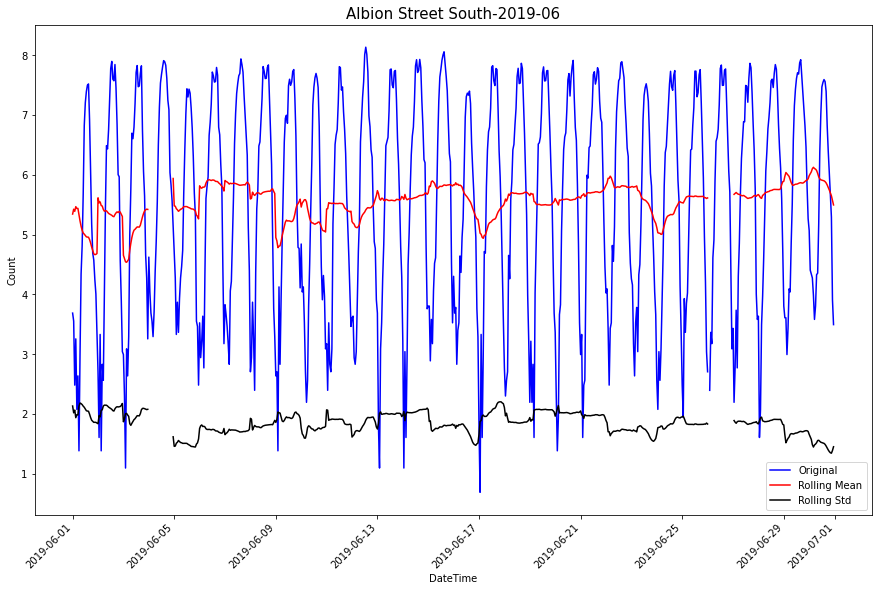

In [29]:
plot(dc_log['Albion Street South-2019-06'], 'Albion Street South-2019-06', 24, set(['rolmean', 'rolstd']))

In [30]:
dc_log_mov_avg = {}
for key, value in dc_log.items():
    dc_log_mov_avg[key] = value -  value.rolling(24).mean()
    dc_log_mov_avg[key].dropna(inplace=True)

dc_log_mov_avg['Albion Street South-2019-06'].head()

DateTime
2019-06-04 23:00:00   -0.809560
2019-06-07 00:00:00   -2.077637
2019-06-07 01:00:00   -2.226904
2019-06-07 02:00:00   -2.415432
2019-06-07 03:00:00   -2.687394
Name: Count, dtype: float64

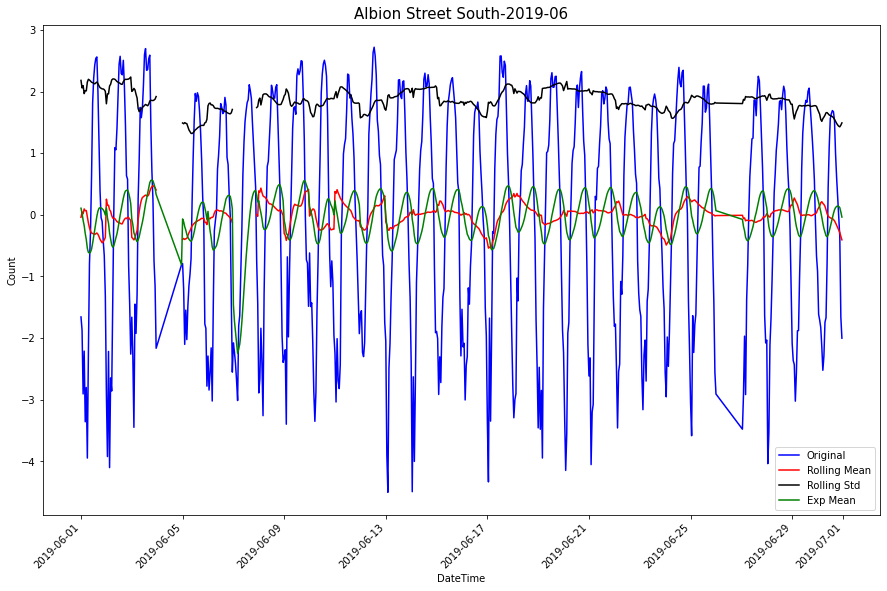

Results of Dickey-Fuller Test:
Test Statistic                -6.501961e+00
p-value                        1.155891e-08
#Lags Used                     2.000000e+01
Number of Observations Used    6.520000e+02
Critical Value (1%)           -3.440419e+00
Critical Value (5%)           -2.865983e+00
Critical Value (10%)          -2.569136e+00
dtype: float64


In [31]:
test_stationarity(dc_log_mov_avg['Albion Street South-2019-06'], 'Albion Street South-2019-06', 24, set(['rolmean', 'rolstd', 'expmean']))

In [32]:
dc_log_exp_avg = {}
for key, value in dc_log.items():
    dc_log_exp_avg[key] = value -  value.ewm(24).mean()
    dc_log_exp_avg[key].dropna(inplace=True)

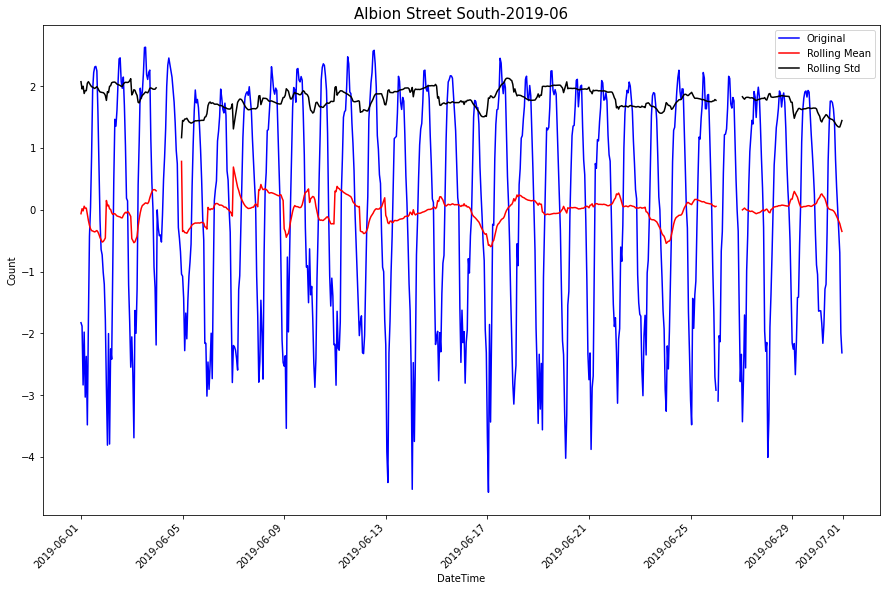

Results of Dickey-Fuller Test:


MissingDataError: exog contains inf or nans

In [33]:
test_stationarity(dc_log_exp_avg['Albion Street South-2019-06'], 'Albion Street South-2019-06', 24, set(['rolmean', 'rolstd']))

In [34]:
dc_log_diff = {}
for key, value in dc_log.items():
    dc_log_diff[key] = value -  value.shift()
    dc_log_diff[key].dropna(inplace=True)

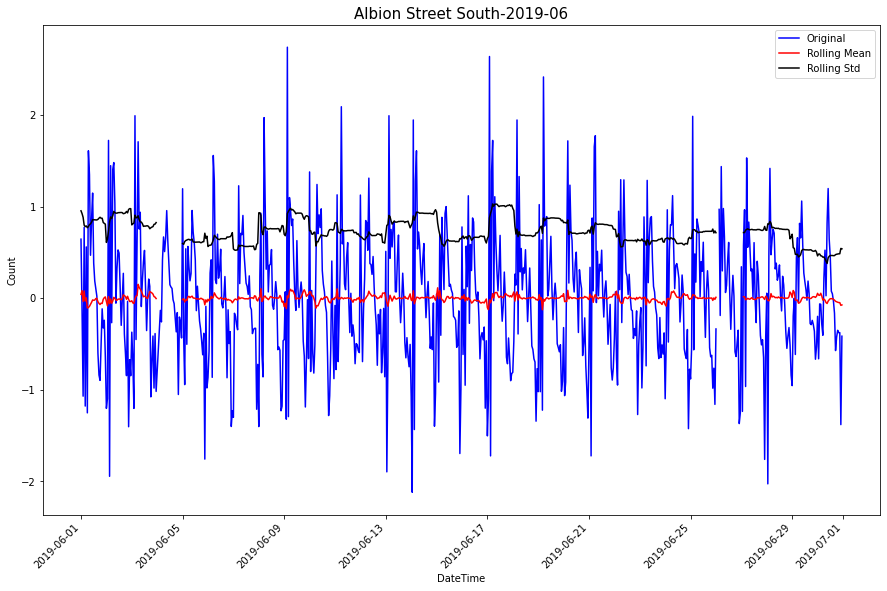

Results of Dickey-Fuller Test:


MissingDataError: exog contains inf or nans

In [35]:
test_stationarity(dc_log_diff['Albion Street South-2019-06'], 'Albion Street South-2019-06', 24, set(['rolmean', 'rolstd']))

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

dc_log_decompose = {}
for key, value in dc_log.items():
    dc_log_decompose[key] = seasonal_decompose(value).resid
    dc_log_decompose[key].dropna(inplace=True)

ValueError: This function does not handle missing values

In [37]:
test_stationarity(dc_log_decompose['Albion Street South-2019-06'], 'Albion Street South-2019-06', 24, set(['rolmean', 'rolstd']))

KeyError: 'Albion Street South-2019-06'

R=-0.13584105925043033


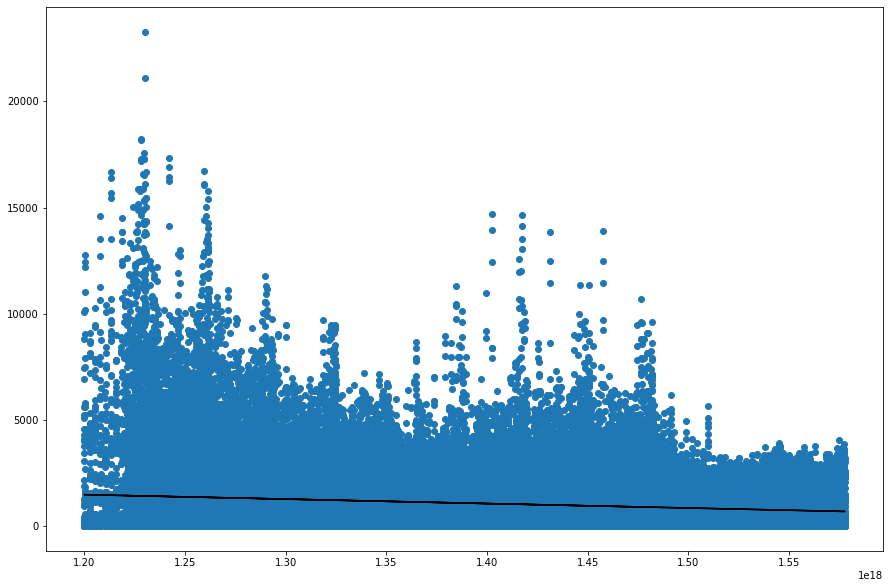

In [38]:
from scipy import stats
x = dc['Albion Street South'].index.values.tolist()
y = dc['Albion Street South'].values.tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)
print('R=' + str(r))
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, color='black')
plt.show()

In [39]:
dc_diff = {}
for key, value in dc.items():
    dc_diff[key] = value -  value.shift()
    dc_diff[key].dropna(inplace=True)

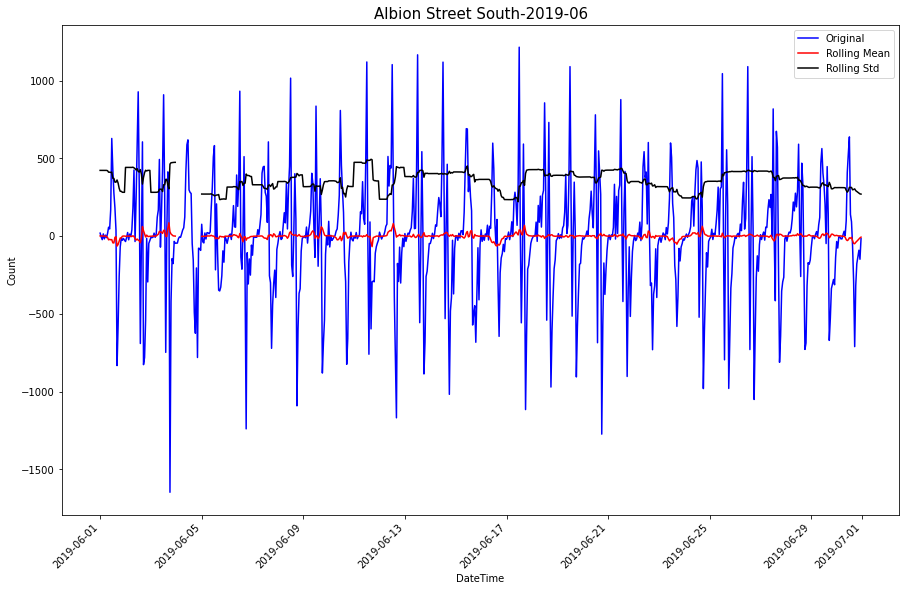

Results of Dickey-Fuller Test:
Test Statistic                 -20.039552
p-value                          0.000000
#Lags Used                      20.000000
Number of Observations Used    698.000000
Critical Value (1%)             -3.439753
Critical Value (5%)             -2.865690
Critical Value (10%)            -2.568980
dtype: float64


In [40]:
test_stationarity(dc_diff['Albion Street South-2019-06'], 'Albion Street South-2019-06', 24, set(['rolmean', 'rolstd']))

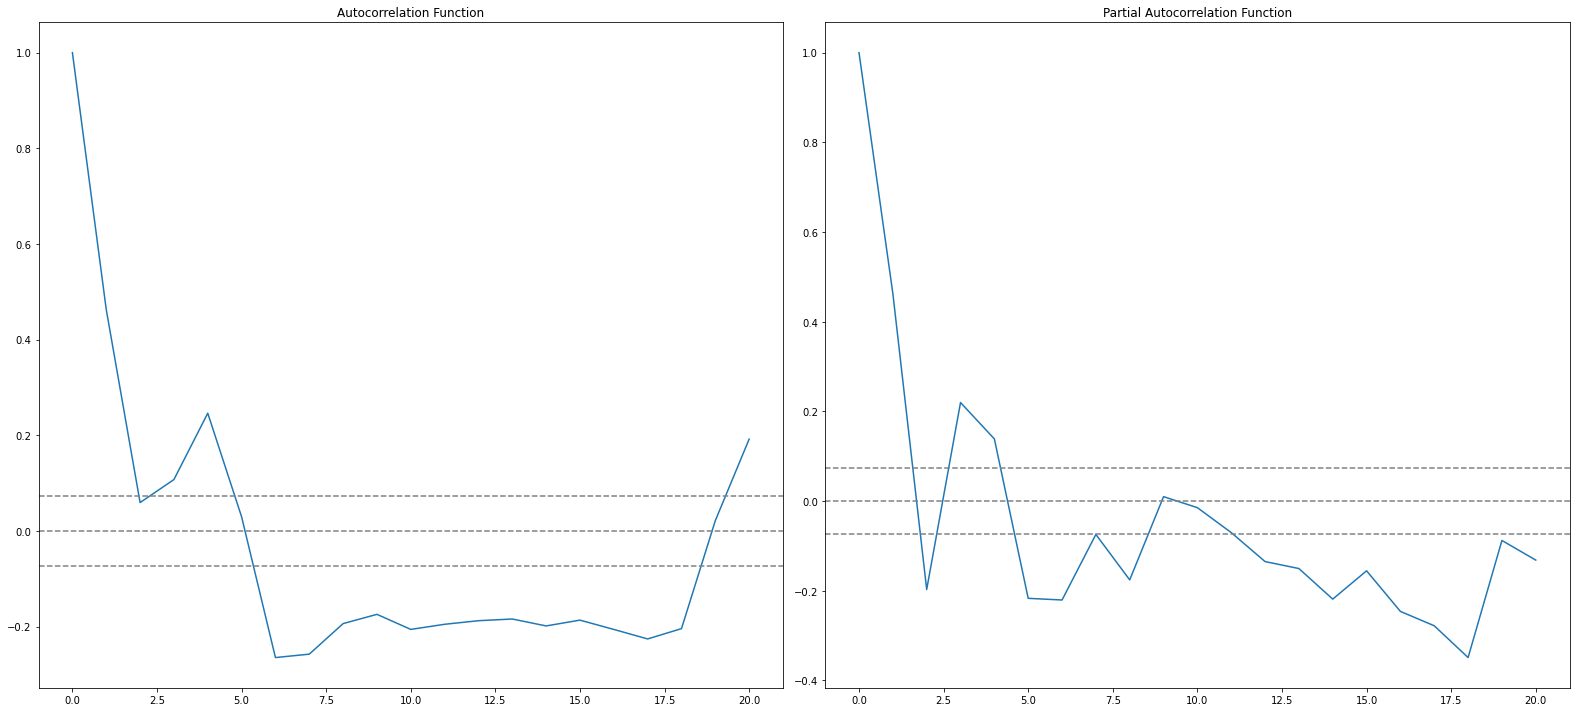

In [41]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
ts_diff = dc_diff['Albion Street South-2019-06']
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


C:\Users\medira\AppData\Local\Temp\ipykernel_16460\2734771492.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\ProgramData\Anaconda3\envs\ambpop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ambpop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ambpop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

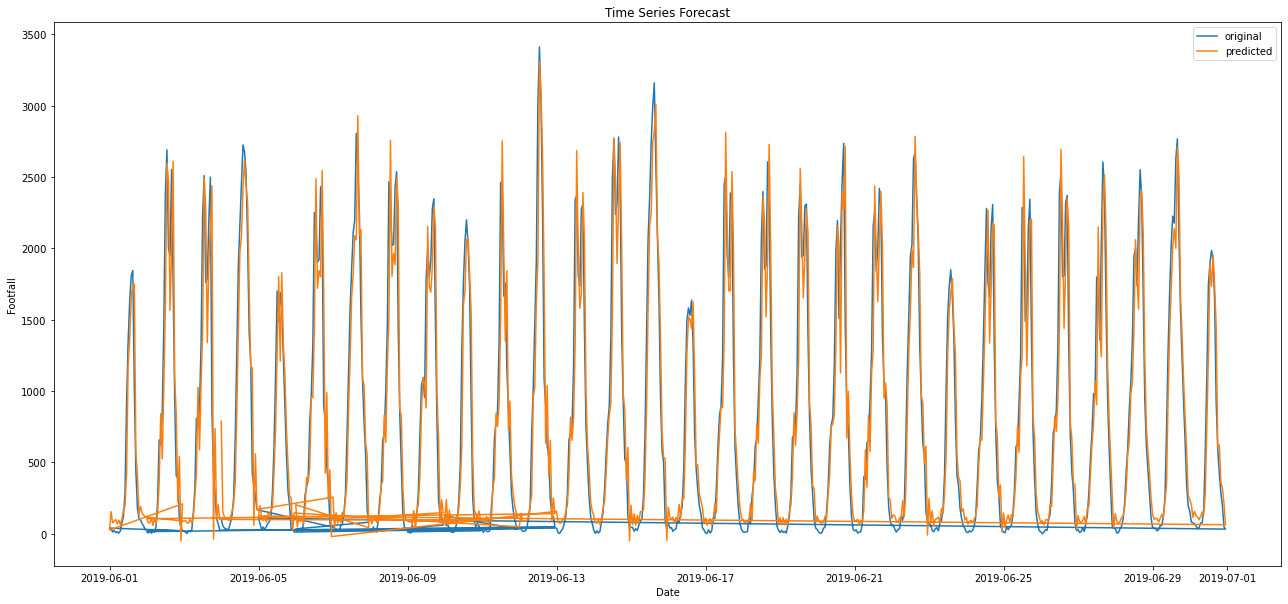

In [49]:
# ARIMA LİBRARY
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

# fit model
ts = dc['Albion Street South-2019-06']

model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()

# predict
forecast = model_fit.predict()

# visualization
plt.figure(figsize=(22,10))
plt.plot(ts, label = "original")
plt.plot(forecast, label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Footfall")
plt.legend()
plt.show()

In [50]:
import folium


m = folium.Map(location=[53.7996, -1.5471], zoom_start=16)

tooltip = "Click"

folium.Marker(
    [53.796803, -1.542389], popup="<i>Briggate</i>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [53.797766, -1.547085], popup="<i>Park Row</i>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [53.799615, -1.543929], popup="<i>Dortmund Square</i>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [53.796199, -1.542792], popup="<i>Briggate at McDonalds</i>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [53.7974, -1.544281], popup="<i>Commercial Street Combined</i>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [53.79941, -1.545003], popup="<i>Headrow</i>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [53.800556, -1.544312], popup="<i>Albion Street at McDonalds</i>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [53.79725, -1.544502], popup="<i>Commercial Street at Barratts</i>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [53.798322, -1.54506], popup="<i>Albion Street North</i>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [53.798322, -1.54506], popup="<i>Albion Street South</i>", tooltip=tooltip
).add_to(m)


m